# Dataset_1 preparation 

**Dataset_1**: This dataset contains only 578 NRAS ligands that were obtained from the initial dataset.

In this script we will prepare two versions of dataset_1 to train models with two different approaches through Chemprop: 
1. Regression Model: The objective is to predict a continuous numerical value, such as the pIC50. To do this we will modify the dataset_positive so that it only contains the information for pIC50. This dataset will be stored as; **Dataset_1_reg**.

2. Classification Model: In classification tasks, the goal is to assign molecules to discrete categories or classes. In our case, we classify NRAS inhibitors as either active or inactive based on the threshold of pIC50.We will create a new column in which pIC50 will be classified as 0 and 1. Where 0 will be for pIC50 less than 7 and 1 for pIC50 greater than 7. This dataset will be stored as; **Dataset_1_class**.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#load file with NRAS ligands and pIC50 from script 5_Data_analysis_pIC50
df = pd.read_csv('../Data/Dataset_pos_pIC50.csv')
print(df.columns)

Index(['SMILES', 'Formula', 'Molecular weight', 'LogP', 'H-bond donor',
       'H-bond acceptor', 'TPSA', 'Rotatable bonds', 'IC50', 'IC50M', 'pIC50'],
      dtype='object')


### Dataset_1_reg


In [17]:
# Drop columns IC50 i IC50M

delate_columns = ['IC50', 'IC50M']
for column in delate_columns:
    del df[column]

#save for the regression approach 
df.to_csv('../Data/Dataset_1_reg.csv', index=False)

### Dataset_1_class

In [18]:
# Definir función para asignar valores enteros
def classification(value, threshold):
    
    if value <= threshold:
        classif = 0
    else:
        classif =  1
    print(value, threshold, classif)
    return classif

# Definir el valor límite
threshold = 7

# Aplicar la función a la columna y reemplazar los valores
df['pIC50'] = df['pIC50'].apply(lambda x: classification(x, threshold))

# Mostrar el DataFrame resultante
print(df)

4.479254528480518 7 0
5.0034883278458215 7 0
5.73754891026957 7 0
4.803547458296611 7 0
4.803547458296611 7 0
5.3535962737769305 7 0
4.82915179635669 7 0
5.029188389127482 7 0
4.779107750780481 7 0
5.429457060118103 7 0
4.526367073126159 7 0
5.3535962737769305 7 0
4.779107750780481 7 0
8.698970004336019 7 1
5.253365801062421 7 0
6.20342566678957 7 0
4.753501419204199 7 0
4.779107750780481 7 0
4.679230771661313 7 0
5.367542707815276 7 0
4.779107750780481 7 0
5.7544873321858505 7 0
5.72584215073632 7 0
5.029188389127482 7 0
7.259637310505756 7 1
5.259637310505756 7 0
7.259637310505756 7 1
6.259637310505756 7 0
7.259637310505756 7 1
6.259637310505756 7 0
6.259637310505756 7 0
5.259637310505756 7 0
7.259637310505756 7 1
7.259637310505756 7 1
7.259637310505756 7 1
5.259637310505756 7 0
6.259637310505756 7 0
5.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.25963731

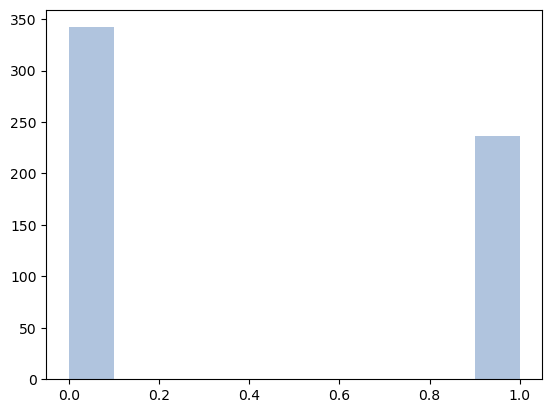

In [19]:
fig, ax = plt.subplots()
ax.hist(df['pIC50'], color = "lightsteelblue")

plt.show()

In [15]:
df.to_csv('../Data/Dataset_1_class.csv', index=False)